# Advanced quantitative techniques - Class 3 - Tobit, GLMs

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf

## A poisson question

In [31]:
gss_2006 = pd.read_csv("Data/GSS_2006.csv")
variables = ['numwomen', 'sex', 'age', 'year', 'marital', 'id']
sub = gss_2006[variables].copy()

In [6]:
sub.numwomen.describe()

count    2306.000000
mean        9.479185
std        62.054323
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max       997.000000
Name: numwomen, dtype: float64

In [46]:
sub = sub[sub.numwomen < 990]
sub.numwomen.describe()

count    2298.000000
mean        6.049173
std        21.711985
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max       500.000000
Name: numwomen, dtype: float64

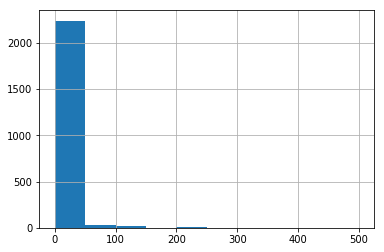

In [8]:
sub.numwomen.hist()

In [77]:
# slide 12
from statsmodels.regression.linear_model import OLS

lm_numwomen = OLS.from_formula('numwomen ~ C(sex) + age + year + C(marital)', data=sub).fit()
lm_numwomen.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               numwomen   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     47.82
Date:                Fri, 17 Aug 2018   Prob (F-statistic):           1.68e-55
Time:                        09:11:05   Log-Likelihood:                -10181.
No. Observations:                2294   AIC:                         2.038e+04
Df Residuals:                    2287   BIC:                         2.042e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2.583e-06   4.26e-07      6.069      0.000    1.75e-06    3.42e-06
C(sex)[T.2]         -14.0753      0.882    -15.951      0.000     -15.806     -12.345
C(marital)[T.2.0]     2.6561      1.778      1.494      0.135      -0.830       6.142
C(marital)[T.3.0]     5.8833      1.219      4.826      0.000       3.493       8.274
C(marital)[T.4.0]     5.7211      2.501      2.287      0.022       0.816      10.626
C(marital)[T.5.0]     2.9650      1.143      2.593      0.010       0.723       5.207
age                   0.0371      0.031      1.203      0.229      -0.023       0.098
year                  0.0052      0.001      6.069      0.000       0.004       0.007
==============================================================================
Omnibus:                     3872.344   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3501083.931
Skew:                          11.213   Prob(JB):                         0.00
Kurtosis:                     193.068   Cond. No.                     3.43e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.85e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [48]:
lm_numwomen.fittedvalues.describe()

count    2294.000000
mean        6.054490
std         7.254798
min        -2.938014
25%        -0.887451
50%         3.687617
75%        12.881654
max        19.433057
dtype: float64

In [69]:
# slide 15
from statsmodels.discrete.count_model import Poisson

pois_numwomen = Poisson.from_formula('numwomen ~ C(sex) + age + year + C(marital)', data=sub).fit()
pois_numwomen.summary()

         Current function value: 6.724257
         Iterations: 35


/Users/melindasong/anaconda/envs/py36/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/melindasong/anaconda/envs/py36/lib/python3.6/site-packages/statsmodels/base/model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/Users/melindasong/anaconda/envs/py36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/melindasong/anaconda/envs/py36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/melindasong/anaconda/envs/py36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:               numwomen   No. Observations:                 2294
Model:                        Poisson   Df Residuals:                     2287
Method:                           MLE   Df Model:                            6
Date:                Fri, 17 Aug 2018   Pseudo R-squ.:                  0.4263
Time:                        09:04:49   Log-Likelihood:                -15425.
converged:                      False   LL-Null:                       -26887.
                                        LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.8010        nan        nan        nan         nan         nan
C(sex)[T.2]          -4.0259      0.054    -74.777      0.000      -4.131      -3.920
C(marital)[T.2.0]     0.6797      0.042     16.229      0.000       0.598       0.762
C(marital)[T.3.0]     0.9068      0.022     40.897      0.000       0.863       0.950
C(marital)[T.4.0]     0.9060      0.041     21.836      0.000       0.825       0.987
C(marital)[T.5.0]     0.5810      0.024     24.404      0.000       0.534       0.628
age                   0.0077      0.001     12.344      0.000       0.006       0.009
year               2.816e-05        nan        nan        nan         nan         nan
=====================================================================================
"""

In [50]:
# slide 17
np.exp(pois_numwomen.params)

Intercept            1.000000
C(sex)[T.2]          0.017847
C(marital)[T.2.0]    1.973222
C(marital)[T.3.0]    2.476400
C(marital)[T.4.0]    2.474389
C(marital)[T.5.0]    1.787882
age                  1.007695
year                 1.000926
dtype: float64

In [51]:
newdata = pd.DataFrame({'year': sub.year.mean(), 
                        'age': sub.age.mean(), 
                        'marital': 1,
                        'sex': [1, 2]})

pois_numwomen.predict(newdata)

0    9.142739
1    0.163166
dtype: float64

In [33]:
sub2 = sub[~pd.isnull(sub.numwomen)]

In [71]:
# slide 19
Poisson.from_formula('numwomen ~ C(sex) + year + C(marital)', data=sub, offset= np.log(sub.age)).fit().summary()

         Current function value: 6.742149
         Iterations: 35


/Users/melindasong/anaconda/envs/py36/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/melindasong/anaconda/envs/py36/lib/python3.6/site-packages/statsmodels/base/model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/Users/melindasong/anaconda/envs/py36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/melindasong/anaconda/envs/py36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/melindasong/anaconda/envs/py36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:               numwomen   No. Observations:                 2294
Model:                        Poisson   Df Residuals:                     2288
Method:                           MLE   Df Model:                            5
Date:                Fri, 17 Aug 2018   Pseudo R-squ.:                  0.4337
Time:                        09:06:12   Log-Likelihood:                -15466.
converged:                      False   LL-Null:                       -27311.
                                        LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.9512        nan        nan        nan         nan         nan
C(sex)[T.2]          -4.0095      0.054    -74.474      0.000      -4.115      -3.904
C(marital)[T.2.0]     0.4783      0.040     12.006      0.000       0.400       0.556
C(marital)[T.3.0]     0.8968      0.022     40.447      0.000       0.853       0.940
C(marital)[T.4.0]     0.9519      0.041     22.995      0.000       0.871       1.033
C(marital)[T.5.0]     0.8476      0.022     39.418      0.000       0.805       0.890
year                  0.0001        nan        nan        nan         nan         nan
=====================================================================================
"""

In [55]:
print('mean:', sub.numwomen.mean())
print('var:', sub.numwomen.var())

mean: 6.04917319408181
var: 471.41029317765583


### The negative binomial regression

In [76]:
# slide 24
from statsmodels.discrete.discrete_model import NegativeBinomial

# removed variable 'year' to bypass fitting problems 
negbin_numwomen = NegativeBinomial.from_formula('numwomen ~ C(sex) + age + C(marital)', data=sub).fit()
negbin_numwomen.summary()

         Current function value: 1.808377
         Iterations: 35
         Function evaluations: 66
         Gradient evaluations: 66


/Users/melindasong/anaconda/envs/py36/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                     NegativeBinomial Regression Results                      
==============================================================================
Dep. Variable:               numwomen   No. Observations:                 2294
Model:               NegativeBinomial   Df Residuals:                     2287
Method:                           MLE   Df Model:                            6
Date:                Fri, 17 Aug 2018   Pseudo R-squ.:                  0.1592
Time:                        09:10:10   Log-Likelihood:                -4148.4
converged:                      False   LL-Null:                       -4934.1
                                        LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.8244      0.159     11.475      0.000       1.513       2.136
C(sex)[T.2]          -4.0484      0.085    -47.606      0.000      -4.215      -3.882
C(marital)[T.2.0]     0.0708      0.173      0.410      0.682      -0.267       0.409
C(marital)[T.3.0]     0.7551      0.107      7.066      0.000       0.546       0.964
C(marital)[T.4.0]     1.4841      0.221      6.721      0.000       1.051       1.917
C(marital)[T.5.0]     0.9089      0.103      8.866      0.000       0.708       1.110
age                   0.0077      0.003      2.465      0.014       0.002       0.014
alpha                 2.0713      0.094     22.114      0.000       1.888       2.255
=====================================================================================
"""

### Zero-inflated negative binomial

In [87]:
from statsmodels.discrete.count_model import ZeroInflatedNegativeBinomialP

ZeroInflatedNegativeBinomialP.from_formula('numwomen ~ C(sex) + age + C(marital) + C(sex)', data=sub).fit().summary()

/Users/melindasong/anaconda/envs/py36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:2929: RuntimeWarning: invalid value encountered in log
  a1 * np.log(a1) + y * np.log(mu) -
/Users/melindasong/anaconda/envs/py36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:2930: RuntimeWarning: invalid value encountered in log
  (y + a1) * np.log(a2))


         Current function value: 1.808543
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39


/Users/melindasong/anaconda/envs/py36/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedNegativeBinomialP Regression Results                    
=========================================================================================
Dep. Variable:                          numwomen   No. Observations:                 2294
Model:             ZeroInflatedNegativeBinomialP   Df Residuals:                     2287
Method:                                      MLE   Df Model:                            6
Date:                           Fri, 17 Aug 2018   Pseudo R-squ.:                  0.1592
Time:                                   10:53:35   Log-Likelihood:                -4148.8
converged:                                 False   LL-Null:                       -4934.1
                                                   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
inflate_const        -7.6529      2.040     -3.752      0.000     -11.650      -3.655
Intercept             1.7547      0.158     11.087      0.000       1.445       2.065
C(sex)[T.2]          -4.0453      0.085    -47.634      0.000      -4.212      -3.879
C(marital)[T.2.0]     0.0245      0.172      0.143      0.886      -0.312       0.361
C(marital)[T.3.0]     0.7547      0.107      7.086      0.000       0.546       0.963
C(marital)[T.4.0]     1.5211      0.222      6.859      0.000       1.087       1.956
C(marital)[T.5.0]     0.9288      0.102      9.078      0.000       0.728       1.129
age                   0.0090      0.003      2.904      0.004       0.003       0.015
alpha                 2.0570      0.093     22.221      0.000       1.876       2.238
=====================================================================================
"""

## The gamma distribution

In [91]:
# slide 34
# OLS baseline first 
variables = ['age', 'year', 'marital', 'id', 'educ', 'realinc']
sub = gss_2006[variables].copy()

lm_realinc = OLS.from_formula('realinc ~ age + I(age**2) + C(marital) + educ', data=sub).fit()
lm_realinc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                realinc   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     162.1
Date:                Fri, 17 Aug 2018   Prob (F-statistic):          1.35e-210
Time:                        11:16:25   Log-Likelihood:                -45054.
No. Observations:                3856   AIC:                         9.012e+04
Df Residuals:                    3848   BIC:                         9.017e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -3.101e+04   4412.851     -7.027      0.000   -3.97e+04   -2.24e+04
C(marital)[T.2.0] -1.777e+04   2046.026     -8.687      0.000   -2.18e+04   -1.38e+04
C(marital)[T.3.0] -2.024e+04   1325.847    -15.263      0.000   -2.28e+04   -1.76e+04
C(marital)[T.4.0] -1.918e+04   2667.964     -7.190      0.000   -2.44e+04    -1.4e+04
C(marital)[T.5.0] -1.613e+04   1278.069    -12.624      0.000   -1.86e+04   -1.36e+04
age                1288.6767    165.960      7.765      0.000     963.299    1614.054
I(age ** 2)         -12.4790      1.622     -7.694      0.000     -15.659      -9.299
educ               3328.1143    146.770     22.676      0.000    3040.360    3615.868
==============================================================================
Omnibus:                     1666.817   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7327.603
Skew:                           2.119   Prob(JB):                         0.00
Kurtosis:                       8.258   Cond. No.                     2.89e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:
# slide 35

gamma_realinc = smf.glm('realinc ~ age + I(age**2) + C(marital) + educ', data=sub, 
        family=sm.families.Gamma(link = sm.genmod.families.links.identity)).fit()
gamma_realinc.summary()

/Users/melindasong/anaconda/envs/py36/lib/python3.6/site-packages/statsmodels/genmod/generalized_linear_model.py:302: DomainWarning: The identity link function does not respect the domain of the Gamma family.
  DomainWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                realinc   No. Observations:                 3856
Model:                            GLM   Df Residuals:                     3848
Model Family:                   Gamma   Df Model:                            7
Link Function:               identity   Scale:                          1.0023
Method:                          IRLS   Log-Likelihood:                -43819.
Date:                Fri, 17 Aug 2018   Deviance:                       2917.9
Time:                        13:24:40   Pearson chi2:                 3.86e+03
No. Iterations:                   100   Covariance Type:             nonrobust
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2.934e+04   3125.301      9.389      0.000    2.32e+04    3.55e+04
C(marital)[T.2.0] -1.571e+04   1589.101     -9.886      0.000   -1.88e+04   -1.26e+04
C(marital)[T.3.0] -1.461e+04   1080.848    -13.514      0.000   -1.67e+04   -1.25e+04
C(marital)[T.4.0] -2.199e+04   1943.868    -11.312      0.000   -2.58e+04   -1.82e+04
C(marital)[T.5.0] -1.868e+04   1381.218    -13.527      0.000   -2.14e+04    -1.6e+04
age                 479.7254    120.678      3.975      0.000     243.201     716.250
I(age ** 2)          -6.6871      1.165     -5.741      0.000      -8.970      -4.404
educ                417.0962     83.656      4.986      0.000     253.134     581.058
=====================================================================================
"""

In [100]:
# slide 36

lm_realinc2 = OLS.from_formula('np.log(realinc) ~ age + I(age**2) + C(marital) + educ', data=sub).fit()

In [103]:
gamma_realinc2 = smf.glm('realinc ~ age + I(age**2) + C(marital) + educ', data=sub, 
                        family=sm.families.Gamma(link=sm.genmod.families.links.log)).fit()
gamma_realinc2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                realinc   No. Observations:                 3856
Model:                            GLM   Df Residuals:                     3848
Model Family:                   Gamma   Df Model:                            7
Link Function:                    log   Scale:                         0.83920
Method:                          IRLS   Log-Likelihood:                -43499.
Date:                Fri, 17 Aug 2018   Deviance:                       2564.2
Time:                        13:09:58   Pearson chi2:                 3.23e+03
No. Iterations:                    17   Covariance Type:             nonrobust
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             8.6120      0.141     61.232      0.000       8.336       8.888
C(marital)[T.2.0]    -0.6165      0.065     -9.454      0.000      -0.744      -0.489
C(marital)[T.3.0]    -0.5652      0.042    -13.376      0.000      -0.648      -0.482
C(marital)[T.4.0]    -0.6131      0.085     -7.210      0.000      -0.780      -0.446
C(marital)[T.5.0]    -0.4760      0.041    -11.684      0.000      -0.556      -0.396
age                   0.0317      0.005      5.984      0.000       0.021       0.042
I(age ** 2)          -0.0003   5.17e-05     -6.279      0.000      -0.000      -0.000
educ                  0.0973      0.005     20.795      0.000       0.088       0.106
=====================================================================================
"""

In [106]:
# slide 37
coef_comparison = pd.DataFrame({'OLS': lm_realinc.params, 
                                'Gamma(identity)': gamma_realinc.params,
                                'OLS(log)': lm_realinc2.params, 
                                'Gamma(log)': gamma_realinc2.params})
round(coef_comparison, 3)

,OLS,Gamma(identity),OLS(log),Gamma(log)
Intercept,-31008.719,29342.726,7.710,8.612
C(marital)[T.2.0],-17774.434,-15709.214,-0.758,-0.617
C(marital)[T.3.0],-20236.091,-14606.715,-0.689,-0.565
C(marital)[T.4.0],-19181.646,-21989.660,-0.823,-0.613
C(marital)[T.5.0],-16134.951,-18683.070,-0.643,-0.476
age,1288.677,479.725,0.050,0.032
I(age ** 2),-12.479,-6.687,-0.000,-0.000
educ,3328.114,417.096,0.111,0.097


## 2. Tobit regression

In [108]:
# slide 64
# simple OLS model first

OLS.from_formula('wordsum ~ age + educ + realinc + C(race)', data=gss_2006).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                wordsum   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     76.85
Date:                Fri, 17 Aug 2018   Prob (F-statistic):           7.34e-70
Time:                        13:31:25   Log-Likelihood:                -2337.5
No. Observations:                1189   AIC:                             4687.
Df Residuals:                    1183   BIC:                             4717.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.5883      0.282      9.171      0.000       2.035       3.142
C(race)[T.2]    -0.8893      0.158     -5.643      0.000      -1.198      -0.580
C(race)[T.3]    -0.7830      0.162     -4.837      0.000      -1.101      -0.465
age              0.0092      0.003      3.002      0.003       0.003       0.015
educ             0.2418      0.017     14.348      0.000       0.209       0.275
realinc       3.797e-06   1.64e-06      2.310      0.021    5.72e-07    7.02e-06
==============================================================================
Omnibus:                       41.470   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.887
Skew:                          -0.424   Prob(JB):                     6.58e-11
Kurtosis:                       3.478   Cond. No.                     2.75e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [126]:
from rpy2.robjects.packages import importr

VGAM = importr('VGAM')

%load_ext rpy2.ipython

In [129]:
d = gss_2006[['wordsum', 'age', 'educ', 'realinc', 'race']].copy()
d = d.dropna()

In [130]:
%%R -i d

vglm(formula = wordsum ~ age + educ + realinc + as.factor(race),
     family = tobit(Upper = 10), data = d)

/Users/melindasong/anaconda/envs/py36/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)



Call:
vglm(formula = wordsum ~ age + educ + realinc + as.factor(race), 
    family = tobit(Upper = 10), data = d)


Coefficients:
   (Intercept):1    (Intercept):2              age             educ 
    2.433398e+00     5.852309e-01     1.007015e-02     2.521583e-01 
         realinc as.factor(race)2 as.factor(race)3 
    3.979296e-06    -9.184553e-01    -7.921469e-01 

Degrees of Freedom: 2378 Total; 2371 Residual
Log-likelihood: -2346.161 


## Python implementation of tobit

https://github.com/jamesdj/tobit

In [118]:
from tobit import *

In [123]:
d = gss_2006[['wordsum', 'age', 'educ', 'realinc', 'race']].copy()
d['race'] = d.race.astype('category')

d = d.dropna().reset_index(drop=True)
x = d[['age', 'educ', 'realinc', 'race']].copy()
y_orig = d['wordsum'].copy()

n_quantiles = 10
quantile = 100/float(n_quantiles)
upper = np.percentile(y_orig, (n_quantiles - 1) * quantile)
right = y_orig > upper
cens= pd.Series(np.zeros((d.shape[0], )))
cens[right] = 1
y = y_orig.clip(upper=upper)


In [124]:
tr = TobitModel()

result = tr.fit(x, y, cens)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''